In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv(r"data\Regression\UnivariateData\24.csv", 
                   sep=",", names=['f1', 'f2']).sample(frac=1).reset_index(drop=True) # 1001
data.insert(loc=0, column='1', value=[1 for i in range(len(data))])

train = data.iloc[:600, :] # 600
val = data.iloc[600:800, :].reset_index(drop=True) # 200
test = data.iloc[800:, :].reset_index(drop=True) # 201

In [21]:
class oneL_nn:
    
    def __init__(self, layer_sizes, learning_rate, num_epochs):
        self.input_size = layer_sizes[0]
        self.h1 = layer_sizes[1]
        self.k = layer_sizes[-1]
        self.params = self.initialize_params()
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def loss(self, y, s):
        return np.square(y - s)/2 

    def initialize_params(self):
        params = dict()
        params['W1'] = np.random.randn(self.h1, self.input_size)
        params['W2'] = np.random.randn(self.k, self.h1+1)
        return params

    def forward(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        cache = dict()
        cache['A1'] = np.dot(W1, x) # j x 1
        cache['H1'] = self.sigmoid(cache['A1']) # j x 1
        cache['H1'] = np.append([[1]], cache['H1'], axis=0) # j+1 x 1
        cache['A2'] = np.dot(W2, cache['H1']) # k x 1
        cache['H2'] = cache['A2'] # k x 1
        return cache['H2'], cache

    def backward(self, x, y):
        s, cache = self.forward(x)

        dell2 = (y - s) * 1 # k x 1
        dW2 = self.learning_rate * np.dot(dell2, cache['H1'].T) # k x j+1
        self.params['W2'] = self.params['W2'] + dW2 # k x j+1

        dell1 = np.dot(self.params['W2'][:, :-1].T, dell2) * cache['H1'][1:] * (1 - cache['H1'][1:]) # j x 1
        dW1 = self.learning_rate * np.dot(dell1, x.T) # j x m
        self.params['W1'] = self.params['W1'] + dW1 # j x m
    
        return self.loss(y, s)

    def epoch(self, train):
        E = []
        for i in range(train.shape[0]):
#             y = np.zeros((self.k, 1))
#             y[train['y'][i]][0] = 1
            y = train.iloc[i, -1]
            x = np.array(train.iloc[i, :-1]).reshape((self.input_size, 1))
            e = self.backward(x, y)
            E.append(e)

        return np.mean(E)

    def fit(self, train):
        history = []
        for i in range(1, self.num_epochs + 1):
            E = self.epoch(train)
            history.append(E)
        return history
    
    def predict(self, test):
        preds = np.zeros(test.shape[0])
        for i in range(test.shape[0]):
            pred, _ = self.forward(np.array(test.iloc[i, :-1]).reshape((self.input_size, 1)))
            preds[i] = pred
        return preds

In [22]:
input_size = 3
layer_sizes = [2, 8, 1]
learning_rate, num_epochs = 0.1, 50 
model = oneL_nn(layer_sizes, learning_rate, num_epochs)

history = model.fit(train)

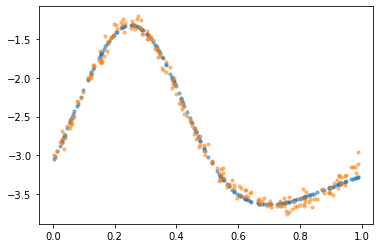

In [27]:
plt.scatter(test.f1, model.predict(test), s=10, alpha=0.5)
plt.scatter(test.f1, test.f2, s=10, alpha=0.5)

In [ ]:
p